In [1]:
import nltk
nltk.download('all')
import re
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import feature_extraction
import pandas as pd
import pickle

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\пк\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\пк\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\пк\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\пк\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\пк\AppData\Roaming\nltk_data...
[nltk_data]    |   Package basqu

[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\пк\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat to
[nltk_data]    |     C:\Users\пк\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nps_chat is already up-to-date!
[nltk_data]    | Downloading package omw to
[nltk_data]    |     C:\Users\пк\AppData\Roaming\nltk_data...
[nltk_data]    |   Package omw is already up-to-date!
[nltk_data]    | Downloading package omw-1.4 to
[nltk_data]    |     C:\Users\пк\AppData\Roaming\nltk_data...
[nltk_data]    |   Package omw-1.4 is already up-to-date!
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     C:\Users\пк\AppData\Roaming\nltk_data...
[nltk_data]    |   Package opinion_lexicon is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_d

[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!
[nltk_data]    | Downloading package vader_lexicon to
[nltk_data]    |     C:\Users\пк\AppData\Roaming\nltk_data...
[nltk_data]    |   Package vader_lexicon is already up-to-date!
[nltk_data]    | Downloading package verbnet to
[nltk_data]    |     C:\Users\пк\AppData\Roaming\nltk_data...
[nltk_data]    |   Package verbnet is already up-to-date!
[nltk_data]    | Downloading package verbnet3 to
[nltk_data]    |     C:\Users\пк\AppData\Roaming\nltk_data...
[nltk_data]    |   Package verbnet3 is already up-to-date!
[nltk_data]    | Downloading package webtext to
[nltk_data]    |     C:\Users\пк\AppData\Roaming\nltk_data...
[nltk_data]    |   Package webtext is already up-to-date!
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\пк\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wmt15_eval is already up-to-date!
[nltk_data]    | Downloading package word2

In [2]:
with open("model.pkl", "rb") as f:
    model1 = pickle.load(f)
#df_for_analis = df[['new_cases','total_deaths','total_cases','Status']]

In [3]:
intents = [
    {
        'tag':'greeting',
        'patterns':[
            'Привет',
            'Хай',
            'Прив'
        ],
        'responses': [
            'Здравствуйте',
                'Хей',
                'Хеллоу'
        ]
    },
    {
        'tag': 'goodbye',
        'patterns':['Пока',
                'Стоп',
                'До свидания'],
        'responses':[
            'До свидания',
                'До связи',
                'Увидимся'
            
        ]
    },
    {
        'tag':'items',
        'patterns':[
            'function',
            'what you can?'
            'help'
        ],
        'responses':['I can predict']
    },
    {
        'tag':'start',
        'patterns':[
           'Старт',
                'Работа',
                'Начать'
        ],
        'responses':[
             'Начинаем',
                'Поехали',
                'Приступим'
                    ]
        
        
    }
    
]

In [4]:
x_train = []
y_train = []

for intent in intents:
    tag = intent['tag']
    for pattern in intent['patterns']:
        x_train.append(pattern)
        y_train.append(tag)
        
class StemmedCountVectorizer(feature_extraction.text.CountVectorizer):
    def build_analyzer(self):
        stemmer = nltk.stem.PorterStemmer()
        analyzer = super().build_analyzer()
        
        def stemming_step(doc):
            stemmed = [stemmer.stem(w) for w in analyzer(doc)]
            stemmed = [token for token in stemmed if re.match(r'\w+',token)]
            return stemmed
        return stemming_step
    
vectorizer = StemmedCountVectorizer(lowercase=True,tokenizer=nltk.word_tokenize, stop_words=['the','a'])
vectorizer.fit(x_train)

labelEncoder = preprocessing.LabelEncoder()
labelEncoder.fit(list(set(y_train)))

C:\anaconda\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


LabelEncoder()

In [5]:
vectorizer.get_feature_names()

['can',
 'function',
 'help',
 'what',
 'you',
 'до',
 'начать',
 'пока',
 'прив',
 'привет',
 'работа',
 'свидания',
 'старт',
 'стоп',
 'хай']

In [6]:
x_train = vectorizer.transform(x_train)
y_train = labelEncoder.transform(y_train)

In [7]:
print(y_train)

[1 1 1 0 0 0 2 2 3 3 3]


In [8]:
x_train.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [9]:
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [10]:
numOfClasses = len(labelEncoder.classes_)
numOfPatterns = (len(vectorizer.get_feature_names()),)
x_train = x_train.toarray()
y_train = to_categorical(y_train)

In [11]:
model = Sequential()
model.add(Dense(15,input_shape = numOfPatterns, activation = 'relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(numOfClasses, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
history = model.fit(x_train,y_train, epochs=60, batch_size=4)

Epoch 1/60
3/3 [==============================] - 0s 3ms/step - loss: 1.3782 - accuracy: 0.0909
Epoch 2/60
3/3 [==============================] - 0s 4ms/step - loss: 1.3669 - accuracy: 0.0909
Epoch 3/60
3/3 [==============================] - 0s 7ms/step - loss: 1.3568 - accuracy: 0.1818
Epoch 4/60
3/3 [==============================] - 0s 2ms/step - loss: 1.3487 - accuracy: 0.1818
Epoch 5/60
3/3 [==============================] - 0s 3ms/step - loss: 1.3395 - accuracy: 0.2727
Epoch 6/60
3/3 [==============================] - 0s 3ms/step - loss: 1.3330 - accuracy: 0.2727
Epoch 7/60
3/3 [==============================] - 0s 3ms/step - loss: 1.3259 - accuracy: 0.2727
Epoch 8/60
3/3 [==============================] - 0s 6ms/step - loss: 1.3207 - accuracy: 0.2727
Epoch 9/60
3/3 [==============================] - 0s 6ms/step - loss: 1.3139 - accuracy: 0.2727
Epoch 10/60
3/3 [==============================] - 0s 6ms/step - loss: 1.3077 - accuracy: 0.2727
Epoch 11/60
3/3 [======================

<function matplotlib.pyplot.show(close=None, block=None)>

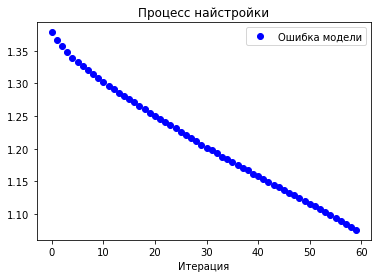

In [14]:
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs,loss,'bo',label='Ошибка модели')
plt.title('Процесс найстройки')
plt.xlabel('Итерация')
plt.ylabel=('Функция потерь')
plt.legend()
plt.show

In [15]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()

In [21]:
def bot(req):

    request = req
    tag = labelEncoder.inverse_transform(
    [model.predict(vectorizer.transform([request])).reshape(-1).argmax()])[0]
    possible_responses = [intent['responses'] for intent in intents if intent['tag'] == tag][0]
    print(random.choice(possible_responses))        
    if tag == 'start':
        x = (input('Введит случаи '))
        i = input('Всего ')
        y = input('Смерти')
        data = {'new_cases':[x],'total_cases':[i],'total_deaths':[y]}
        df = pd.DataFrame(data)
        print(df)
        df_scal = scal.fit_transform(df)

In [ ]:
with open('bot.pkl','wb') as f:
    pickle.dump(model, f)